In [166]:
%matplotlib inline

import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [142]:
G = 4.302*(10**-3) #pc (km/s)^2 / Msun
divpot = 0
N = 100
vel = 200 # km/s
pos = 16000 # pc
stepsize = 100 #s
rd.seed(10)
x = [rd.uniform(-pos,pos) for i in range(N)]
y = [rd.uniform(-pos,pos) for i in range(N)]
z = [rd.uniform(-pos,pos) for i in range(N)]
vx = [rd.uniform(-vel,vel) for i in range(N)]
vy = [rd.uniform(-vel,vel) for i in range(N)]
vz = [rd.uniform(-vel,vel) for i in range(N)]
mass = np.vstack(np.ones(len(x)))

In [159]:
coords = np.zeros((10,100,3))
velocities = np.zeros((10,100,3))
coords[0] = np.array(list(zip(x,y,z)))
velocities[0] = np.array(list(zip(vx,vy,vz)))

In [160]:
def force(m1, m2, p1, p2, divpot):
    t = G*m1*m2*(p1-p2)
    b = np.linalg.norm(p1-p2)**3
    return t/b - divpot

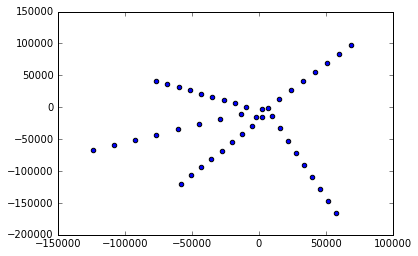

In [175]:
forces = np.zeros((10,100,3))

fig = plt.figure()
for time in range(10):
    for i in range(N):
        Fi = np.zeros(3)
        for j in range(N):
            if i != j:
                    Fi += force(mass[i], mass[j], coords[time][i], coords[time][j], divpot)
        forces[time][i] = Fi
    try:
        velocities[time+1] = velocities[time] + stepsize*forces[time]/mass
        coords[time+1] = coords[time] + stepsize*velocities[time]
    except:
        continue
    plt.scatter(coords[time][:,0], coords[time][:,1])